# 부록. 다른 그레이디언트 부스팅 라이브러리

In [28]:
!pip install -q --upgrade xgboost lightgbm catboost

## LightGBM

In [29]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/handson-gb/main/Appendix/student-por.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,NaN,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [30]:
y = df.iloc[:, -1]
X = df.iloc[:, :-3]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
import lightgbm as lgb

lgbr = lgb.LGBMRegressor(random_state=42)

In [33]:
cat_columns = X_train.columns[X_train.dtypes==object].tolist()
for c in cat_columns:
    X_train[c] = X_train[c].astype('category')
    X_test[c] = X_test[c].astype('category')

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 213 to 102
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      486 non-null    category
 1   sex         485 non-null    category
 2   age         485 non-null    float64 
 3   address     486 non-null    category
 4   famsize     486 non-null    category
 5   Pstatus     486 non-null    category
 6   Medu        486 non-null    int64   
 7   Fedu        486 non-null    int64   
 8   Mjob        486 non-null    category
 9   Fjob        486 non-null    category
 10  reason      486 non-null    category
 11  guardian    485 non-null    category
 12  traveltime  486 non-null    int64   
 13  studytime   486 non-null    int64   
 14  failures    486 non-null    int64   
 15  schoolsup   486 non-null    category
 16  famsup      486 non-null    category
 17  paid        486 non-null    category
 18  activities  486 non-null    category
 19  nurser

In [35]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lgbr, X_train, y_train, scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

2.78376593734659

### XGBRegressor의 히스토그램 기반 부스팅

In [36]:
X_oe = pd.get_dummies(X)
X_oe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                648 non-null    float64
 1   Medu               649 non-null    int64  
 2   Fedu               649 non-null    int64  
 3   traveltime         649 non-null    int64  
 4   studytime          649 non-null    int64  
 5   failures           649 non-null    int64  
 6   famrel             649 non-null    int64  
 7   freetime           649 non-null    int64  
 8   goout              649 non-null    int64  
 9   Dalc               649 non-null    int64  
 10  Walc               649 non-null    int64  
 11  health             649 non-null    int64  
 12  absences           649 non-null    int64  
 13  school_GP          649 non-null    uint8  
 14  school_MS          649 non-null    uint8  
 15  sex_F              649 non-null    uint8  
 16  sex_M              649 non

In [37]:
import xgboost as xgb

X_train_oe, X_test_oe = train_test_split(X_oe, random_state=42)

xgbr = xgb.XGBRegressor(tree_method='hist', grow_policy='lossguide')

scores = cross_validate(xgbr, X_train_oe, y_train, scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

2.8554759086042276

xgboost 1.6 버전부터 `'approx'`, `'hist'`, `'gpu_hist'`에서 범주형 특성을 지원합니다.

In [38]:
xgbr = xgb.XGBRegressor(tree_method='hist', grow_policy='lossguide', enable_categorical=True)

scores = cross_validate(xgbr, X_train, y_train, scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/core.py", line 506, in inner_f
    return f(**kwargs)
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py", line 788, in fit
    model, feval, params = self._configure_fit(xgb_model, eval_metric, params)
  File "/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py", line 655, in _configure_f

nan

### LightGBM 튜닝

In [12]:
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'num_leaves': randint(10, 100),
    'max_depth': randint(1, 10),
    'min_child_samples': randint(10, 40),
    'n_estimators': randint(50, 300),
    'learning_rate': loguniform(1e-3, 0.1),
    'subsample': loguniform(0.6, 1.0),
    'subsample_freq': randint(1, 5),
}

rs = RandomizedSearchCV(lgbr, param_grid, n_iter=300, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)

print('최상의 매개변수:', rs.best_params_)
print('최상의 교차 검증 점수:', -rs.best_score_)

최상의 매개변수: {'learning_rate': 0.021887293880411753, 'max_depth': 3, 'min_child_samples': 17, 'n_estimators': 193, 'num_leaves': 45, 'subsample': 0.8656809331397646, 'subsample_freq': 2}
최상의 교차 검증 점수: 2.63508853549706


### 모델 저장

In [13]:
import joblib

lgbr = rs.best_estimator_

joblib.dump(lgbr, 'lightgbm_model.joblib')
lgbr = joblib.load('lightgbm_model.joblib')

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = lgbr.predict(X_test)

mean_squared_error(y_pred, y_test, squared=False)

2.742443918665029

### 특성 중요도

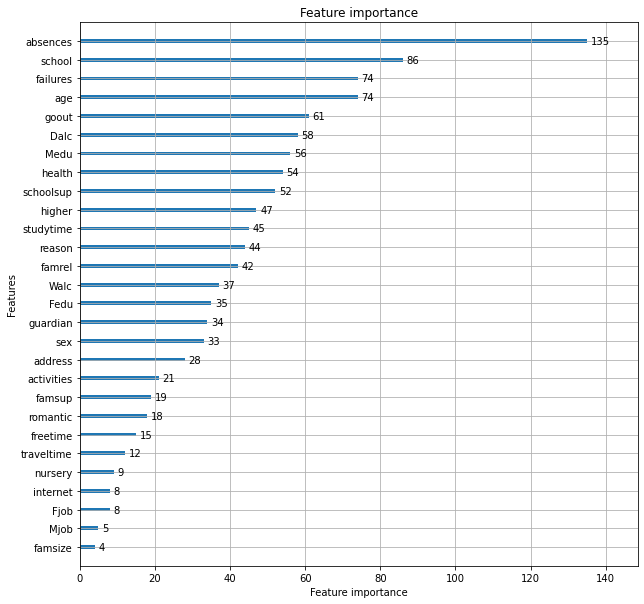

In [15]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgbr, figsize=(10,10))
plt.show()

In [23]:
xgbr.fit(X_train_oe, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(xgbr, ax=ax)
plt.show()

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

### 트리 그래프

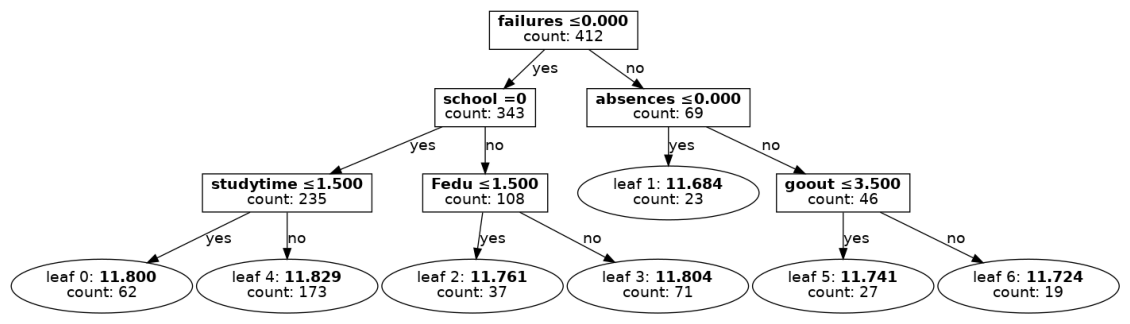

In [17]:
lgb.plot_tree(lgbr, tree_index=0, figsize=(20,10),
              orientation='vertical', 
              show_info=['internal_count', 'leaf_count'])
plt.show()

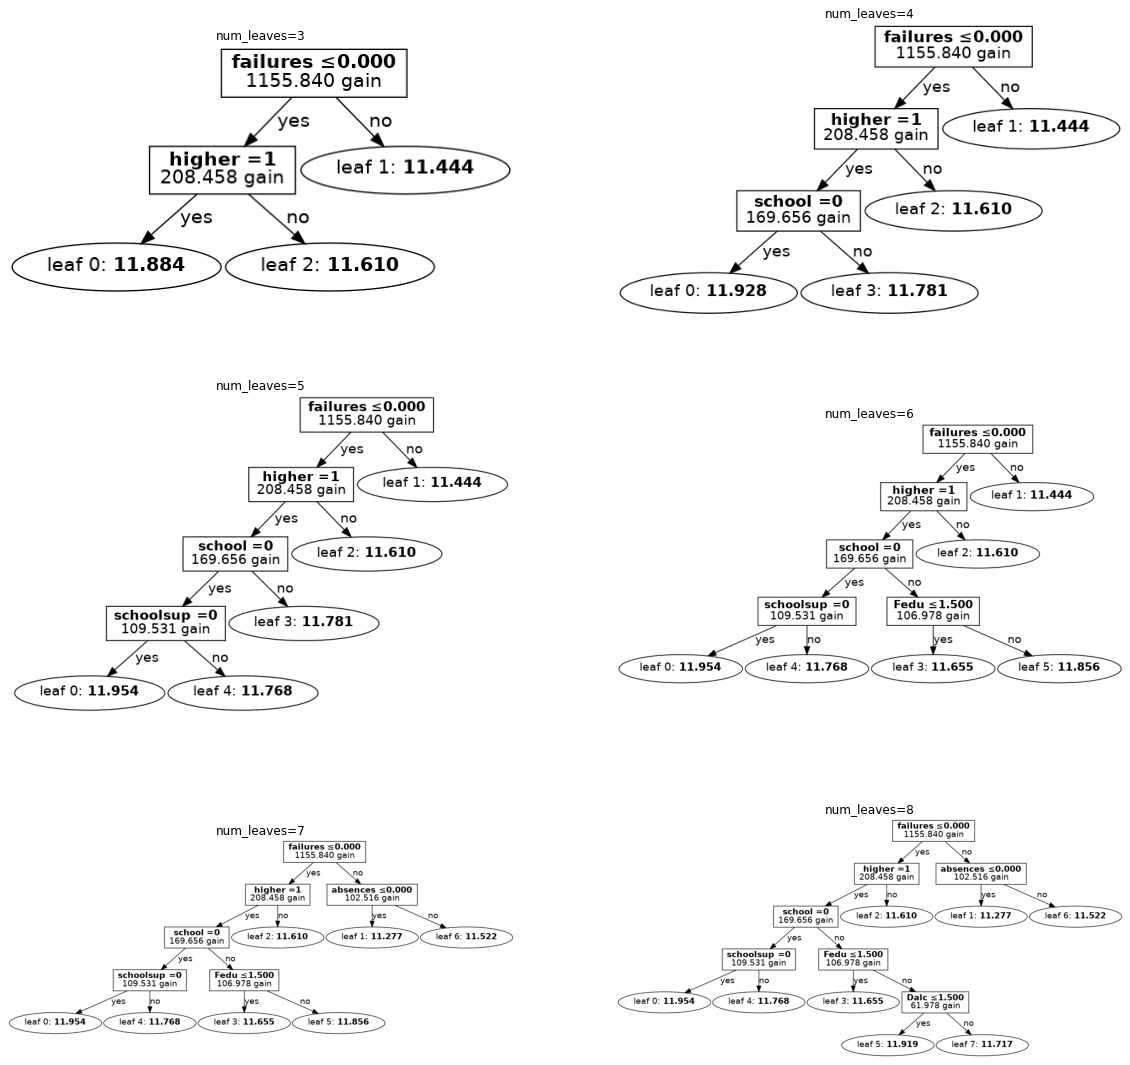

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
for i in range(0, 3):
    for j in range(0, 2):
        lgbr2 = lgb.LGBMRegressor(num_leaves=i*2+j+3)
        lgbr2.fit(X_train, y_train)
        lgb.plot_tree(lgbr2, tree_index=0, show_info=['split_gain'],
                      orientation='vertical', ax=axs[i, j])
        axs[i, j].set_title('num_leaves={}'.format(i*2+j+3))

NotFittedError: need to call fit or load_model beforehand

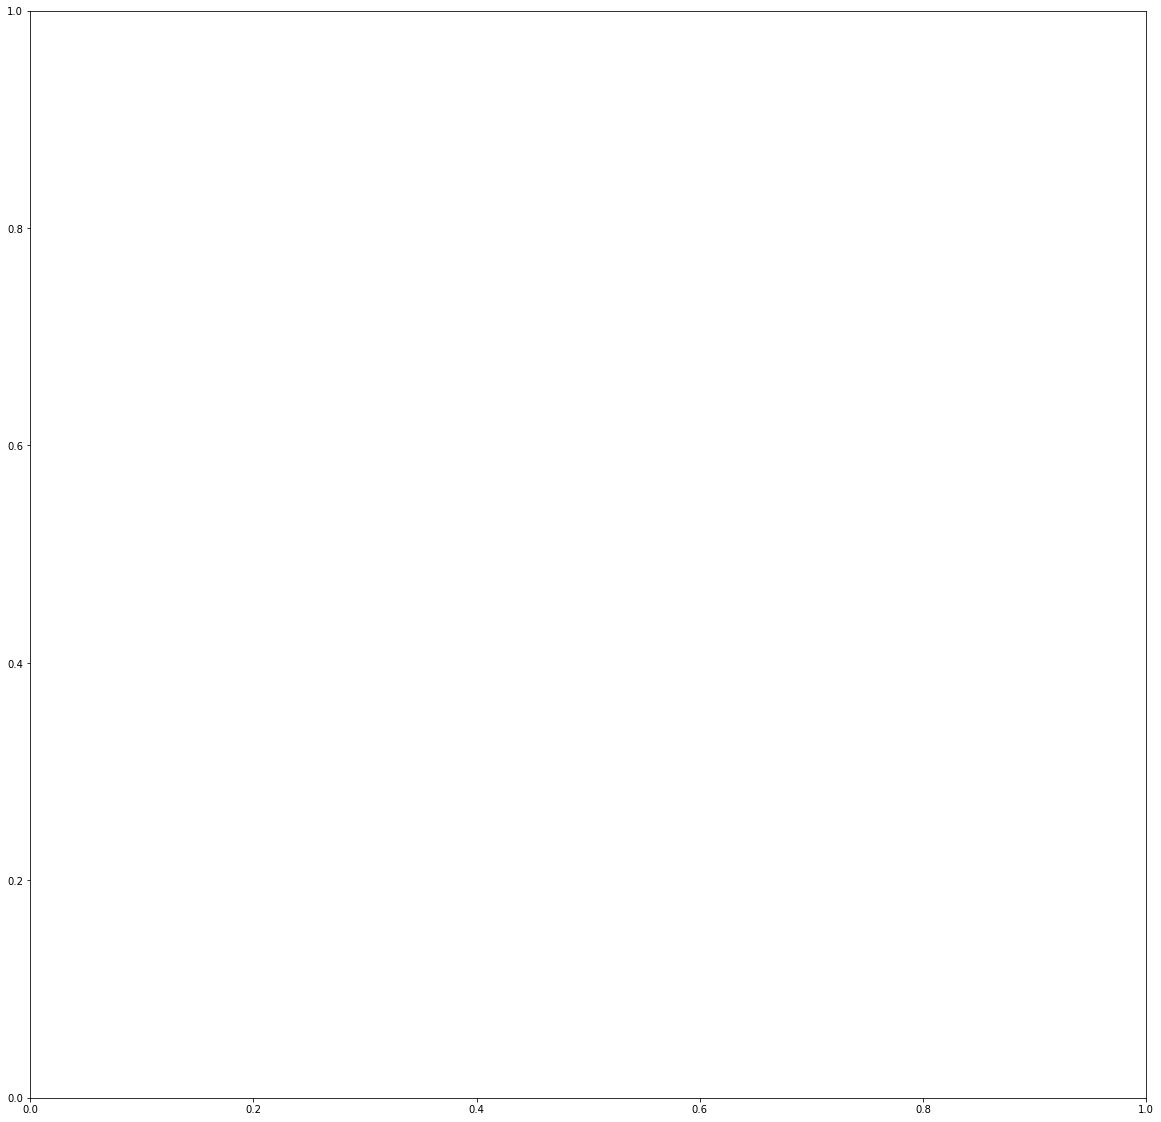

In [19]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgbr, num_trees=0, ax=ax)
plt.show()

## HistGradientBoostingRegressor

In [20]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_columns_bool = X_train.dtypes=='category'
ct = ColumnTransformer([('ord', OrdinalEncoder(), cat_columns_bool)], 
                       remainder='passthrough')
X_train_ord = ct.fit_transform(X_train)

ValueError: Input contains NaN

In [21]:
import numpy as np
cat_num_names = np.append(ct.feature_names_in_[cat_columns_bool], 
                          ct.feature_names_in_[~cat_columns_bool])

X_train_ord = pd.DataFrame(X_train_ord, columns=cat_num_names)[X_train.columns]
X_train_ord.head()

AttributeError: 'ColumnTransformer' object has no attribute 'feature_names_in_'

In [22]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(categorical_features=cat_columns_bool, 
                                     random_state=42)

scores = cross_validate(hgbr, X_train_ord, y_train, 
                        scoring='neg_root_mean_squared_error')
-scores['test_score'].mean()

ImportError: cannot import name 'HistGradientBoostingRegressor'

### 특성 중요도

In [24]:
from sklearn.inspection import permutation_importance

hgbr.fit(X_train_ord, y_train)
result = permutation_importance(hgbr, X_train_ord, y_train, random_state=42)

NameError: name 'hgbr' is not defined

In [25]:
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.show()

NameError: name 'result' is not defined

## CatBoost

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

ct2 = ColumnTransformer([('str', mode_imputer, cat_columns_bool),
                         ('num', mean_imputer, ~cat_columns_bool)])

X_train_ct = pd.DataFrame(ct2.fit_transform(X_train), 
                          columns=cat_num_names)
X_train_ct = X_train_ct[X_train.columns]
X_train_ct.head()

NameError: name 'cat_num_names' is not defined

In [39]:
param_grid = {
    'n_estimators': randint(100, 300),
    'depth': randint(4, 10),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_child_samples': randint(10, 40),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

In [40]:
import catboost as cb

cat_columns_idx = np.where(cat_columns_bool)[0]

cbr = cb.CatBoostRegressor(cat_features=cat_columns_idx, 
                           verbose=False, random_seed=42)

In [41]:
rs = RandomizedSearchCV(cbr, param_grid, n_iter=100,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1, random_state=42)
rs.fit(X_train_ct, y_train)

print('최상의 매개변수:', rs.best_params_)
print('최상의 교차 검증 점수:', -rs.best_score_)

NameError: name 'X_train_ct' is not defined

In [42]:
cbr = cb.CatBoostRegressor(cat_features=cat_columns_idx, verbose=False, random_seed=42)
result = cbr.randomized_search(param_grid, X_train_ct, y_train, 
                               cv=5, n_iter=100, verbose=False)

NameError: name 'X_train_ct' is not defined

In [43]:
print('최상의 매개변수:', result['params'])
print('최상의 교차 검증 점수:', result['cv_results']['test-RMSE-mean'][-1])

NameError: name 'result' is not defined

In [44]:
plt.plot(result['cv_results']['train-RMSE-mean'], label='train-RMSE-mean')
plt.plot(result['cv_results']['test-RMSE-mean'], label='test-RMSE-mean')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

NameError: name 'result' is not defined

### 모델 저장과 복원

In [45]:
cbr.save_model('catboost_model.cbm')
cbr = cb.CatBoostRegressor().load_model('catboost_model.cbm')

CatBoostError: There is no trained model to use save_model(). Use fit() to train model. Then use this method.

In [46]:
cbr.save_model('catboost_model.json', format='json')
cbr = cb.CatBoostRegressor().load_model('catboost_model.json', format='json')

CatBoostError: There is no trained model to use save_model(). Use fit() to train model. Then use this method.

In [47]:
X_test_ct = pd.DataFrame(ct2.transform(X_test), 
                         columns=cat_num_names)
X_test_ct = X_test_ct[X_test.columns]

y_pred = cbr.predict(X_test_ct)
mean_squared_error(y_pred, y_test, squared=False)

NameError: name 'cat_num_names' is not defined

### 특성 중요도

In [48]:
feature_importances = cbr.get_feature_importance()
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.show()

CatBoostError: Model has no meta information needed to calculate feature importances.                         Pass training dataset to this function.